Скачиваем датасет. Данный датасет является весьма актуальным, так как медицина является одним из основных направлений, в котором активно применяют нейронные сети.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/medical-image-dataset-brain-tumor-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/medical-image-dataset-brain-tumor-detection


Загружаем и подключаем библиотеку ultralytics

In [3]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Выбираем модель yolov11

In [4]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 191MB/s]


Подготавливаем датасет

In [5]:
import yaml
import os

root = path
yml_file_path = os.path.join(root, 'BrainTumor', 'BrainTumorYolov11', 'data.yaml')

try:
    with open(yml_file_path, 'r') as file:
        data = yaml.safe_load(file)
except FileNotFoundError:
    print(f"Error: data.yaml file not found at {yml_file_path}")
    exit()

train_path = os.path.join(root, 'BrainTumor', 'BrainTumorYolov11', 'train')
val_path = os.path.join(root, 'BrainTumor', 'BrainTumorYolov11', 'valid')
test_path = os.path.join(root, 'BrainTumor', 'BrainTumorYolov11', 'test')

if not all(os.path.exists(p) for p in [train_path, val_path, test_path]):
    print("Error: One or more of the train/val/test directories does not exist.")
    exit()

data['train'] = train_path
data['val'] = val_path
data['test'] = test_path

print(data)

output_dir = './updated_config.yml'
with open(output_dir, 'w') as file:
    yaml.dump(data, file)

{'train': '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train', 'val': '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid', 'test': '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test', 'nc': 3, 'names': ['glioma', 'meningioma', 'pituitary']}


Запускаем бейслайн

In [6]:
basic_model = model.train(
    data=output_dir,
    epochs=5,
    imgsz=256)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./updated_config.yml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

100%|██████████| 755k/755k [00:00<00:00, 98.8MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,425 parameters, 2,590,409 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.4±1.1 MB/s, size: 31.9 KB)


train: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:28<00:00, 75.40it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6.3±0.8 MB/s, size: 34.0 KB)


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:07<00:00, 76.50it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.457G      1.519      2.958      1.294         31        256: 100%|██████████| 134/134 [00:23<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]


                   all        612        612      0.597      0.539      0.552      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5     0.547G      1.405      1.859       1.23         24        256: 100%|██████████| 134/134 [00:20<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.93it/s]

                   all        612        612      0.548      0.556      0.553      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.559G      1.354      1.605      1.224         20        256: 100%|██████████| 134/134 [00:20<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.61it/s]

                   all        612        612      0.695      0.641      0.692      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.574G      1.281      1.461      1.174         30        256: 100%|██████████| 134/134 [00:20<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.96it/s]

                   all        612        612      0.776      0.725      0.791      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.588G      1.188      1.321      1.132         25        256: 100%|██████████| 134/134 [00:20<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.82it/s]

                   all        612        612      0.806      0.798      0.842        0.6



5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.99it/s]


                   all        612        612      0.806      0.798      0.842        0.6
                glioma        285        285      0.737       0.65      0.691      0.408
            meningioma        142        142      0.817      0.911      0.942      0.755
             pituitary        185        185      0.864      0.832      0.895      0.636
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


Смотрим на результаты бейслайна

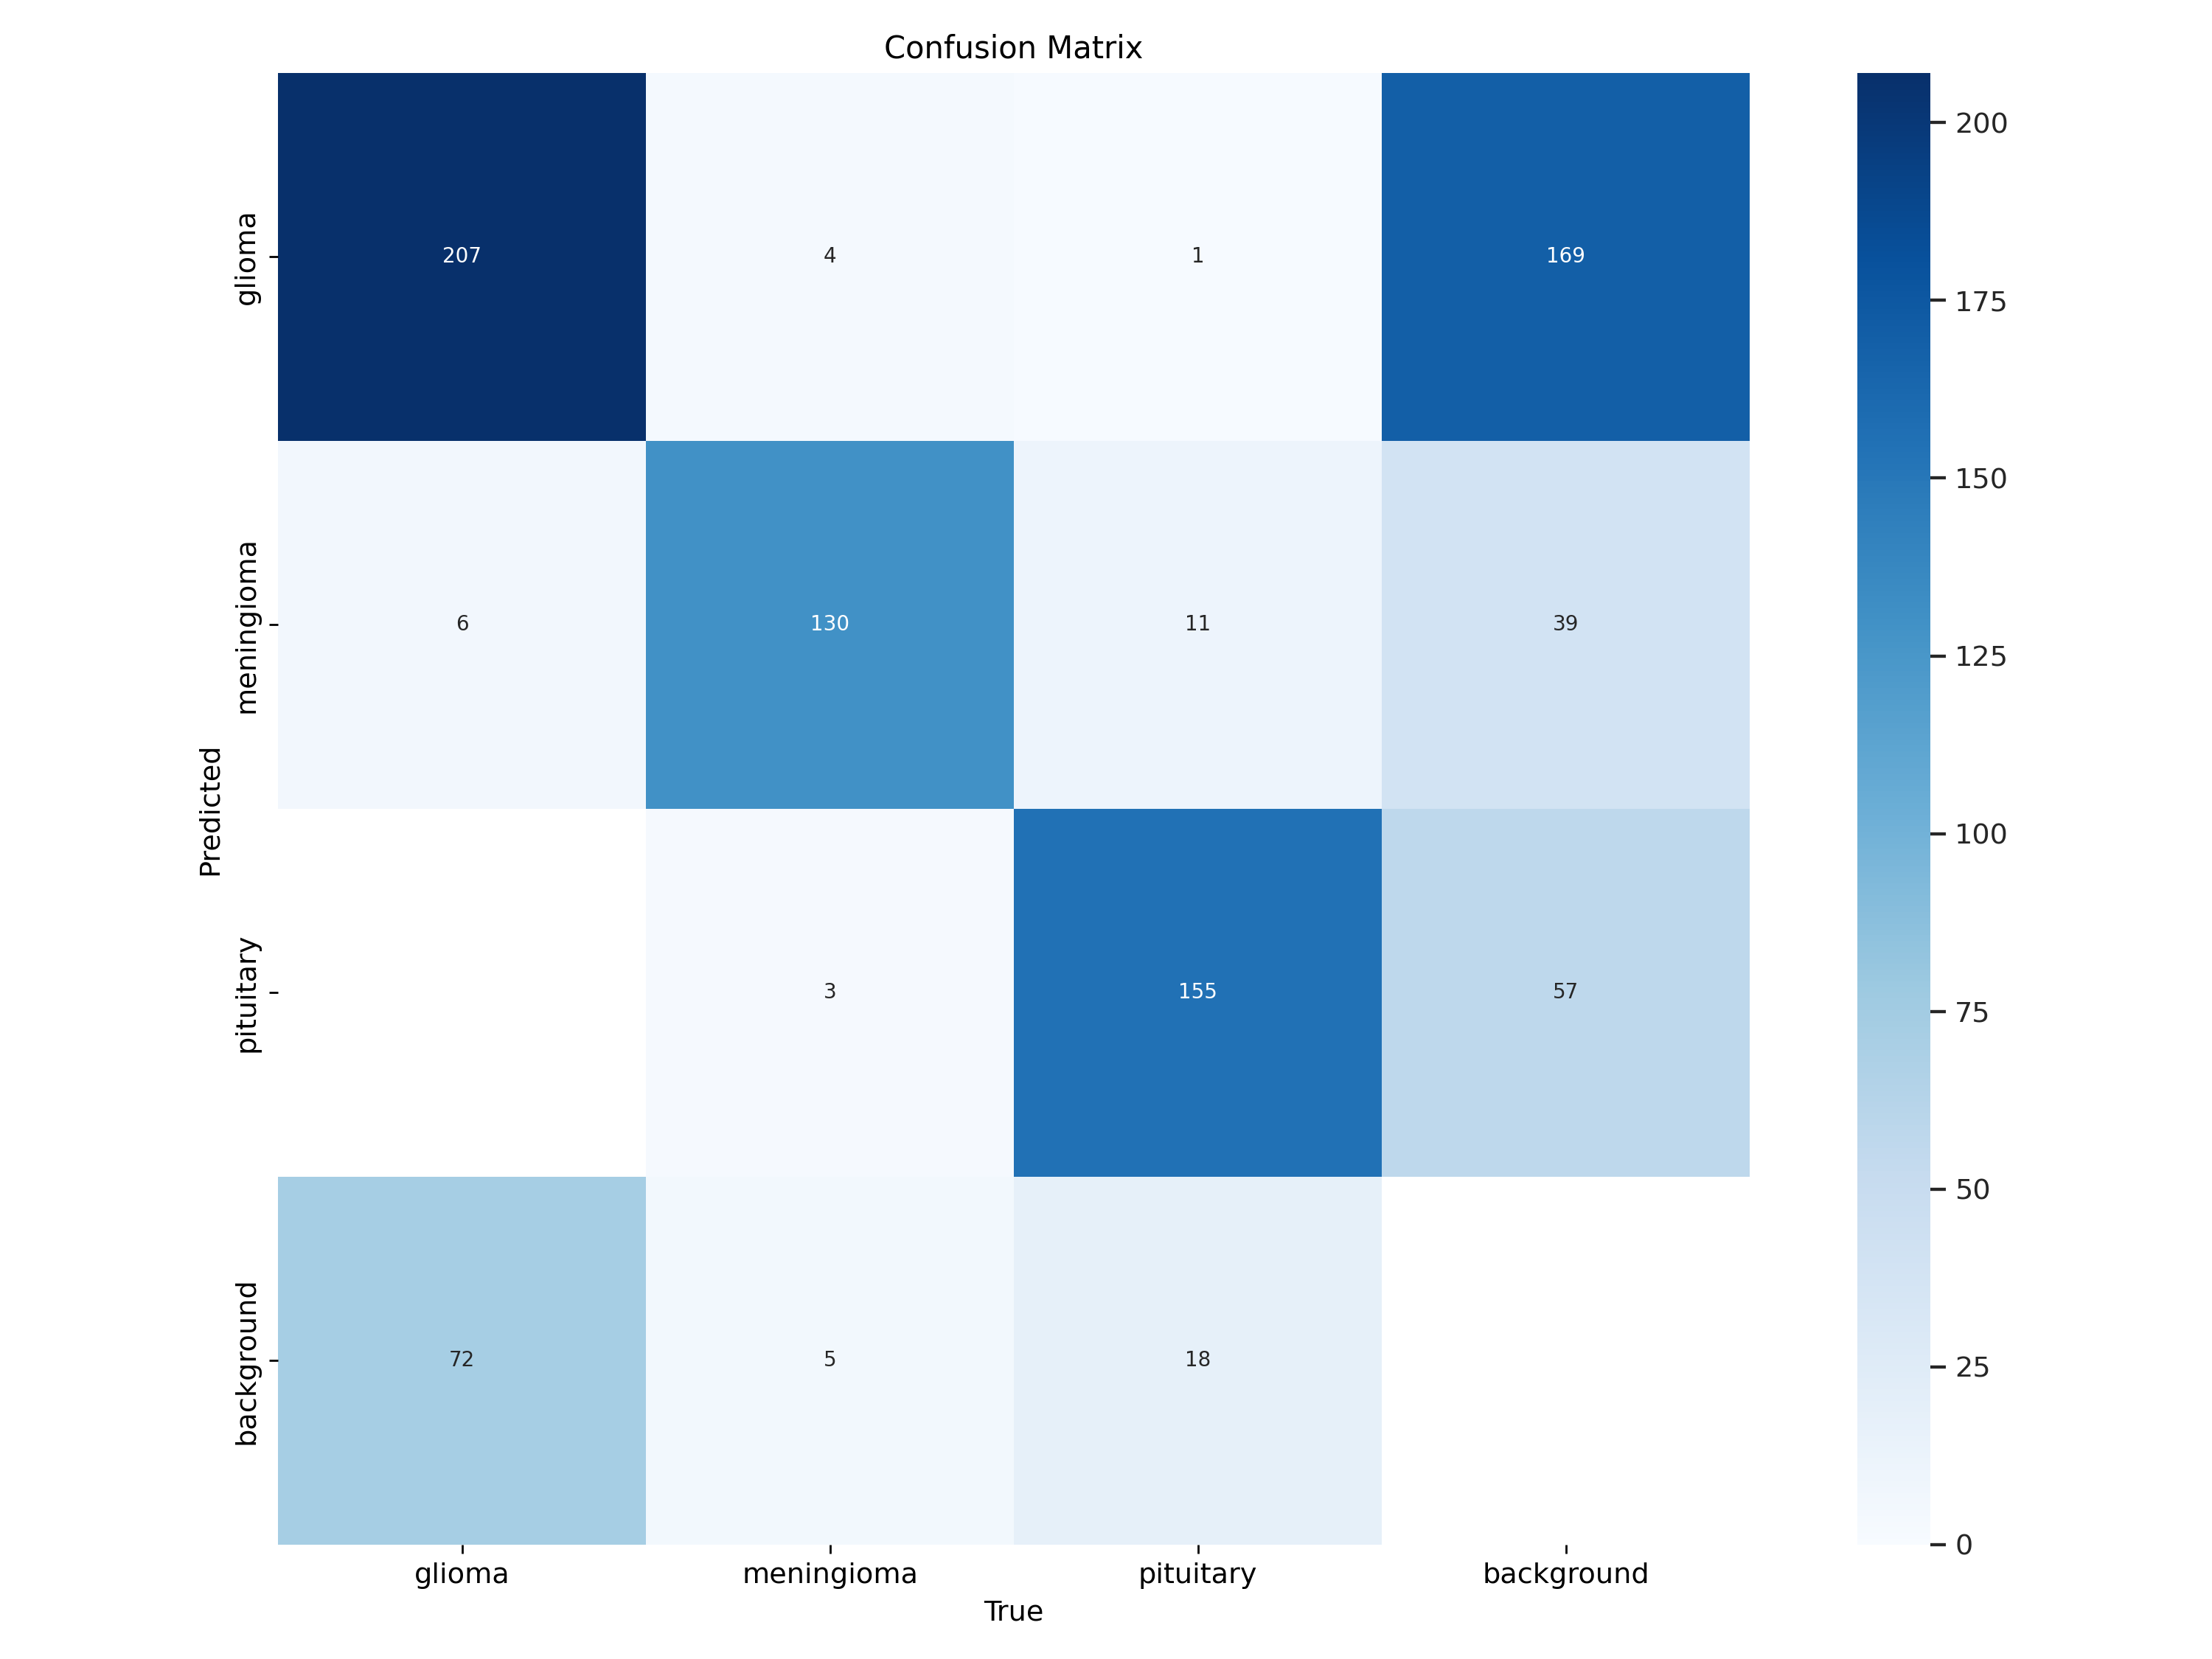

In [7]:
from PIL import Image
from matplotlib import pyplot as plt
Image.open(f"runs/detect/train/confusion_matrix.png")

In [8]:
Image.open(f"runs/detect/train/P_curve.png")

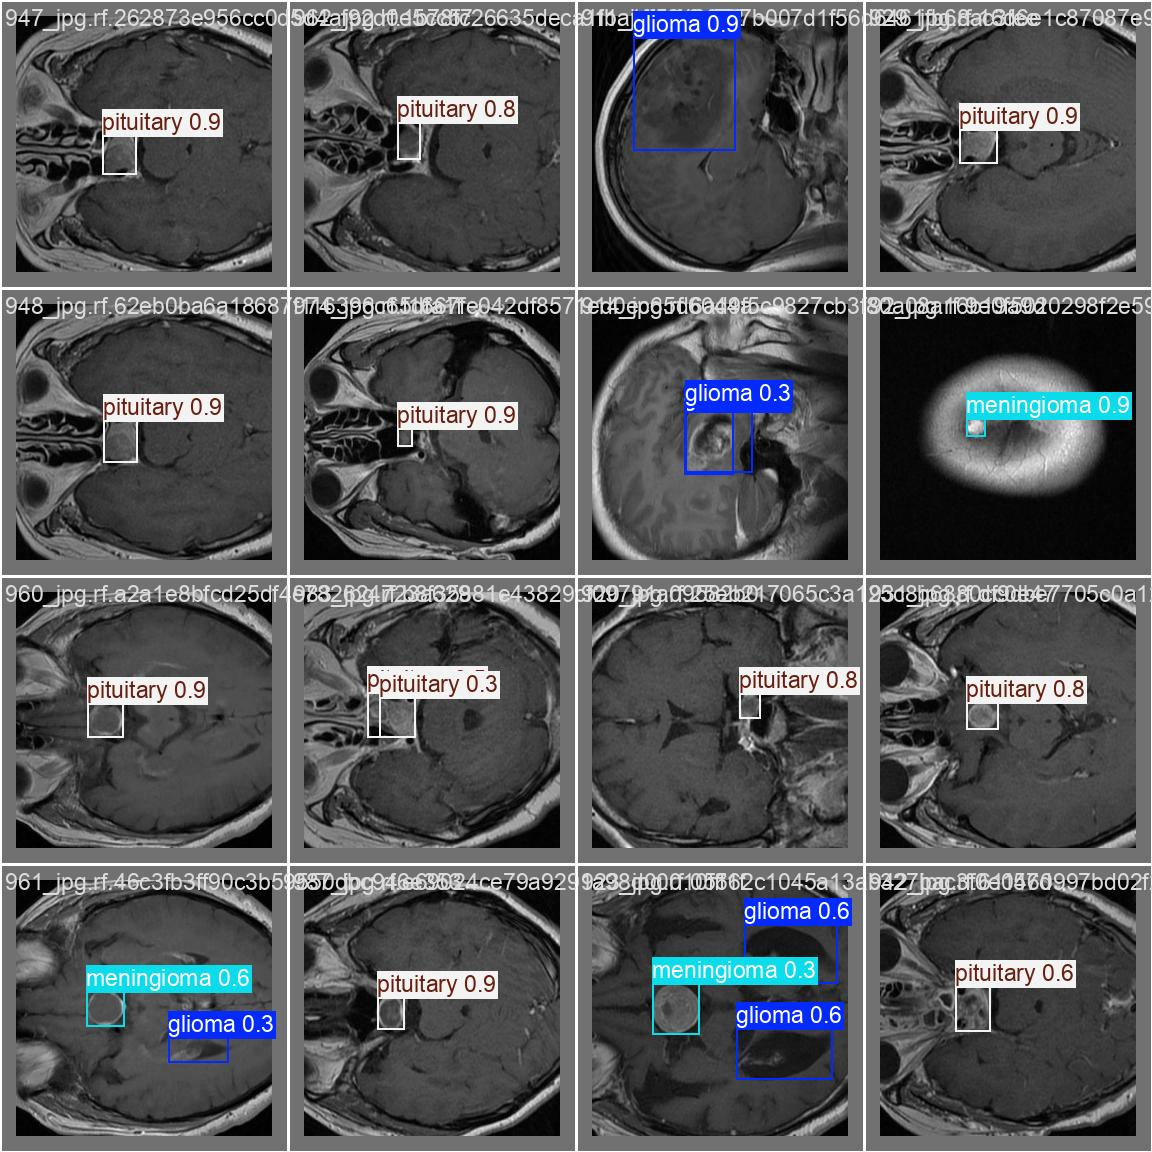

In [9]:
Image.open(f"runs/detect/train/val_batch0_pred.jpg")

Улучшим бейслайн. Увеличим размер изображения, увеличим крличество эпох, добавим аугментацию.

In [12]:
model_impl = YOLO("yolo11n.pt")
results_impl = model_impl.train(
    data=output_dir, epochs=15, imgsz=320, batch=8,
    name='yolo11`',
    augment=True,
    lr0=0.01
)

Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./updated_config.yml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11`, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

train: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:07<00:00, 292.32it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±0.4 ms, read: 39.8±2.8 MB/s, size: 34.0 KB)


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:02<00:00, 267.09it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolo11`/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11`
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15     0.436G       1.46      2.912      1.337         13        320: 100%|██████████| 268/268 [00:36<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.16it/s]


                   all        612        612      0.461      0.537      0.495      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15     0.457G      1.439      2.044      1.327         12        320: 100%|██████████| 268/268 [00:36<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.20it/s]


                   all        612        612      0.629      0.545      0.621      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15     0.473G      1.407      1.811      1.325         12        320: 100%|██████████| 268/268 [00:34<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.04it/s]


                   all        612        612       0.57      0.621      0.568      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15     0.486G      1.389      1.669       1.31          8        320: 100%|██████████| 268/268 [00:34<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.10it/s]


                   all        612        612      0.593      0.625      0.616      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15       0.5G      1.324      1.549      1.266         14        320: 100%|██████████| 268/268 [00:33<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.49it/s]


                   all        612        612      0.741      0.708      0.777      0.546
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15     0.512G      1.207      1.384       1.23          8        320: 100%|██████████| 268/268 [00:33<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.41it/s]

                   all        612        612      0.791      0.723      0.796      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15     0.525G      1.168      1.266      1.204          8        320: 100%|██████████| 268/268 [00:33<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.52it/s]


                   all        612        612      0.778       0.77      0.817      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15     0.541G      1.143      1.142      1.188          8        320: 100%|██████████| 268/268 [00:33<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.46it/s]


                   all        612        612      0.817      0.779      0.839      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15     0.555G      1.095       1.08      1.167          8        320: 100%|██████████| 268/268 [00:33<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.29it/s]

                   all        612        612      0.819      0.791      0.853      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      0.57G      1.063      1.037      1.143          8        320: 100%|██████████| 268/268 [00:33<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.57it/s]

                   all        612        612      0.827      0.801      0.855      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15     0.584G      1.035     0.9512      1.126          8        320: 100%|██████████| 268/268 [00:33<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.53it/s]

                   all        612        612      0.812      0.822      0.876      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15       0.6G       1.01     0.9301      1.107          8        320: 100%|██████████| 268/268 [00:33<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.32it/s]

                   all        612        612      0.848      0.814      0.882      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15     0.613G     0.9638     0.8604      1.084          8        320: 100%|██████████| 268/268 [00:32<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.43it/s]

                   all        612        612      0.861      0.818      0.885      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15     0.629G     0.9419     0.8136      1.072          8        320: 100%|██████████| 268/268 [00:32<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.56it/s]

                   all        612        612      0.885      0.817      0.903      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15     0.643G     0.9128     0.7592      1.051          8        320: 100%|██████████| 268/268 [00:32<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.57it/s]


                   all        612        612      0.887      0.829      0.905       0.68

15 epochs completed in 0.161 hours.
Optimizer stripped from runs/detect/yolo11`/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/yolo11`/weights/best.pt, 5.4MB

Validating runs/detect/yolo11`/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  5.61it/s]


                   all        612        612      0.868      0.833      0.904      0.687
                glioma        285        285      0.775      0.678      0.785      0.528
            meningioma        142        142      0.942      0.918      0.969      0.813
             pituitary        185        185      0.887      0.903      0.958      0.719
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/yolo11`


Смотрим на результаты улучшенного бейслайна

In [13]:
Image.open(f"runs/detect/yolo11`/confusion_matrix.png")

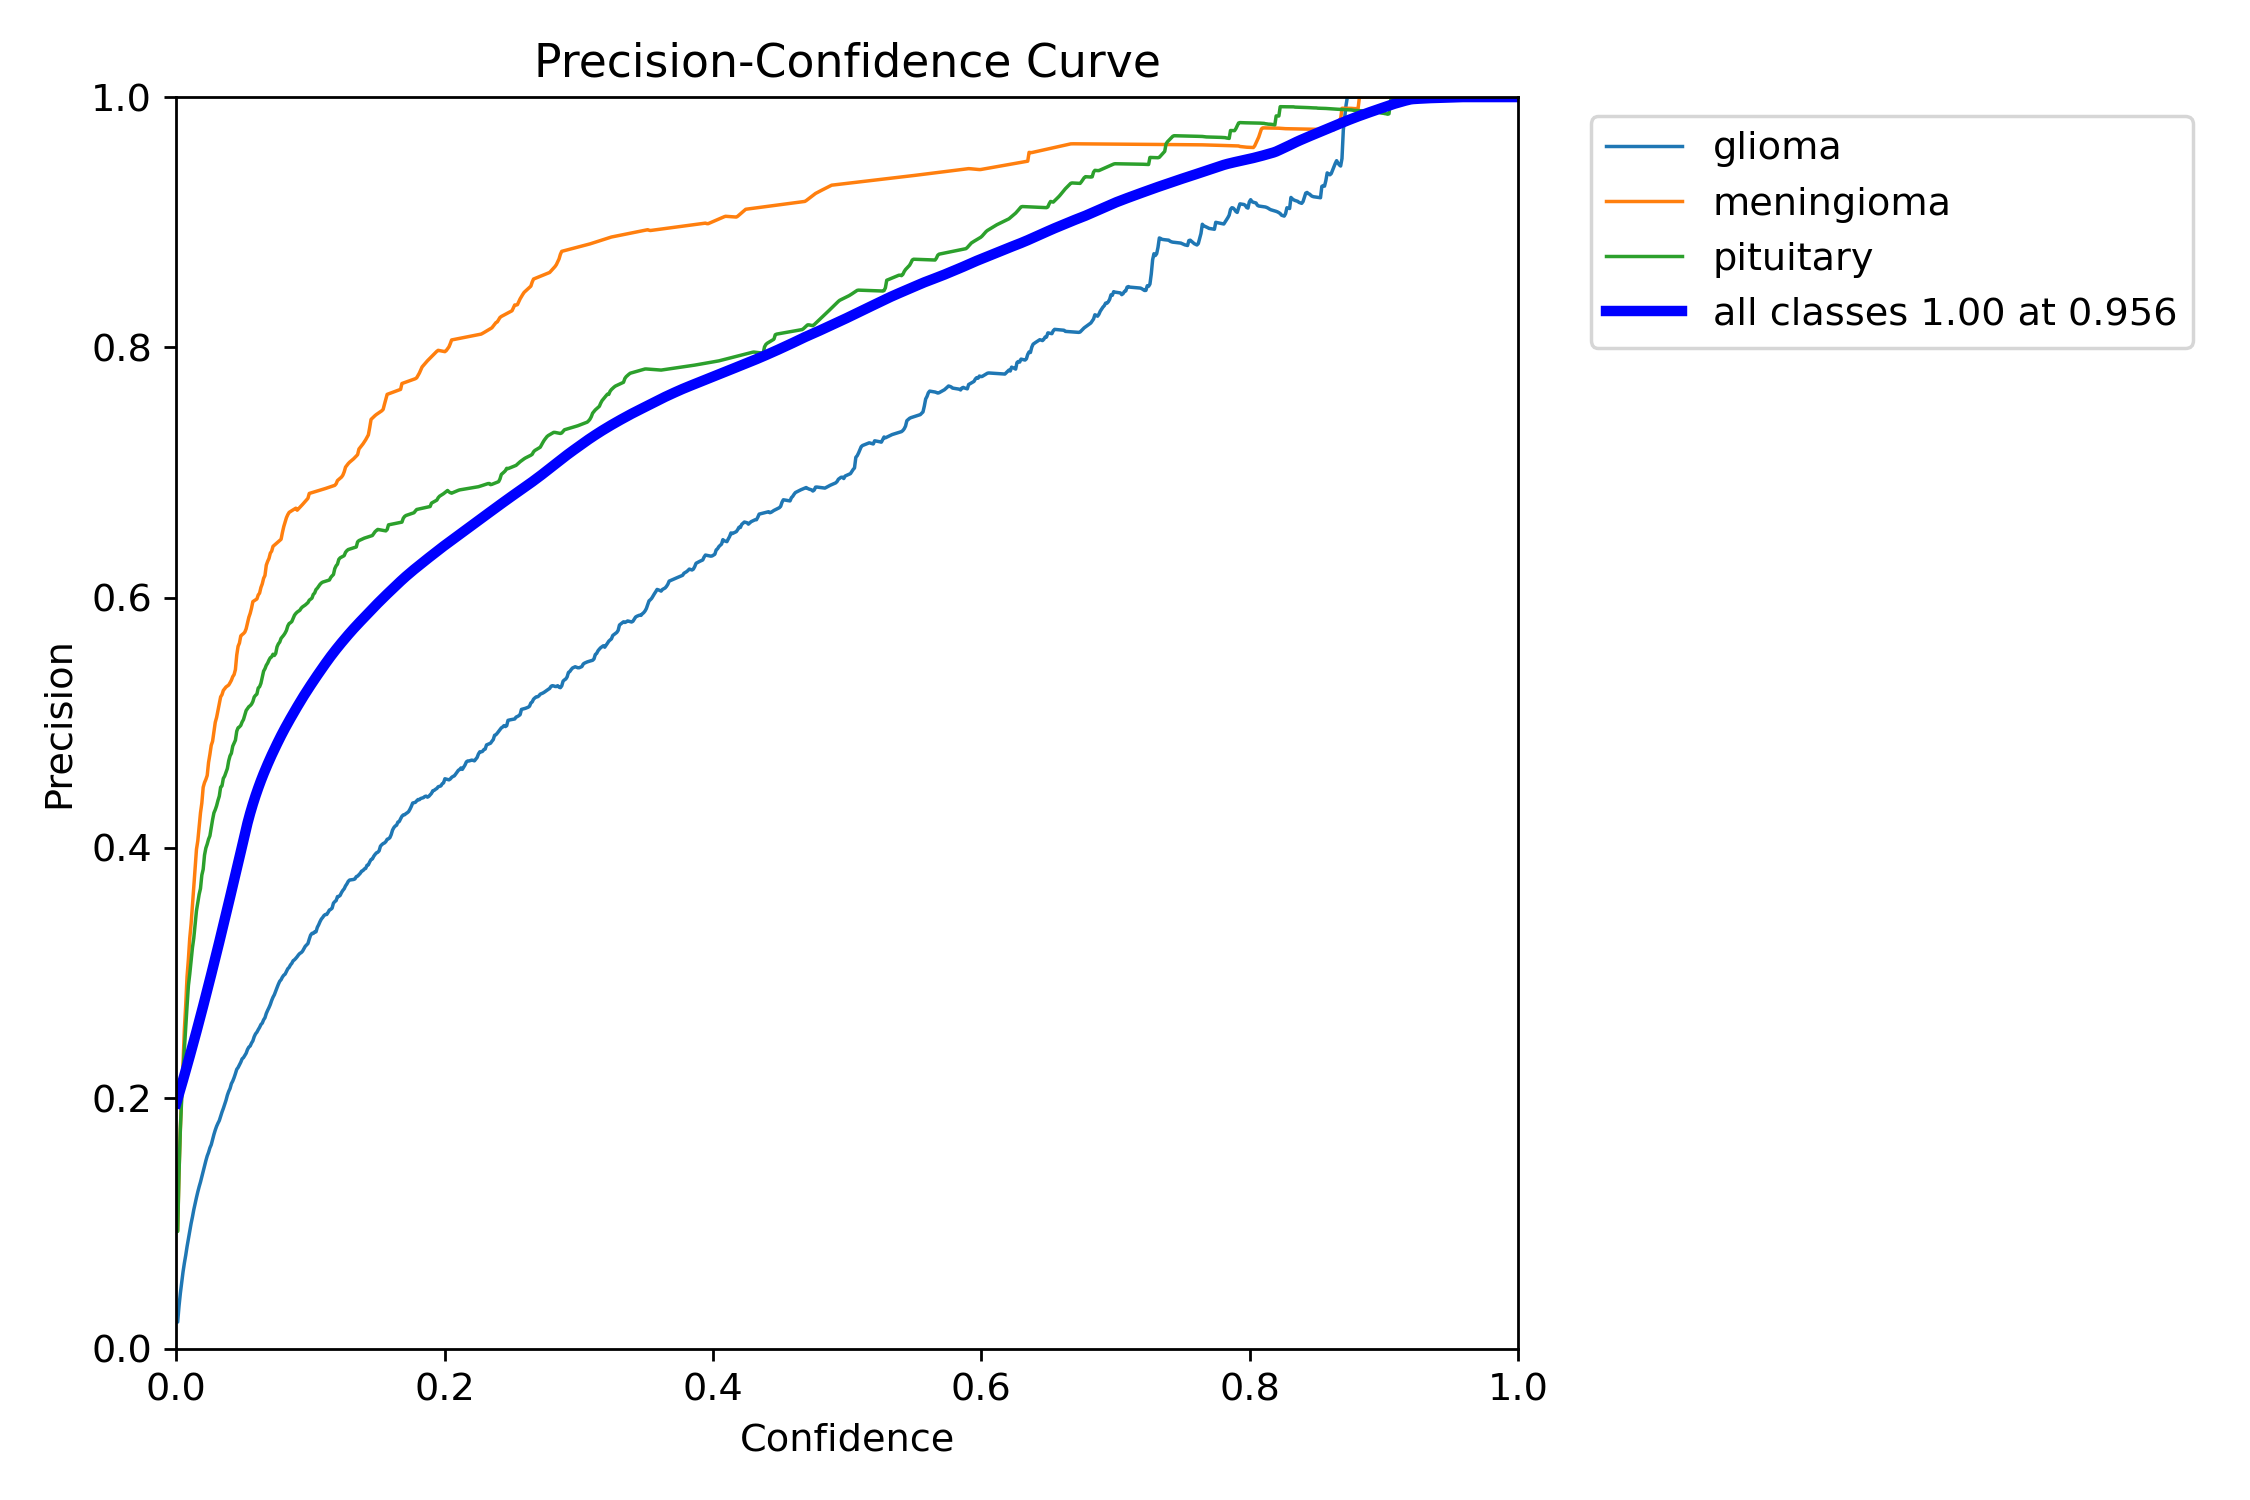

In [14]:
Image.open(f"runs/detect/yolo11`/P_curve.png")

In [15]:
Image.open(f"runs/detect/yolo11`/val_batch0_pred.jpg")

В целом модель стала работать лучше. Так например метрика mAP50 уыеличилась с 0.84 до 0.9